In [1]:
import everest
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astropy.timeseries import BoxLeastSquares
from astropy import units as u
import pandas as pd
import numpy as np
from scipy import fftpack
from numpy import polyfit
from astropy.timeseries import TimeSeries
from astropy.utils.data import get_pkg_data_filename
import lightkurve as lk
plt.rc('text', usetex=False)
import pyke
from exoctk.lightcurve_fitting.lightcurve import LightCurve
from exoctk.lightcurve_fitting.parameters import Parameters
from exoctk.lightcurve_fitting.models import PolynomialModel, TransitModel
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

### Download star

Stars are saved at `/Users/daniella/.everest2/k2`

In [2]:
#EPIC 211331236  #K2-117-bc  #Period = 1.3, 5.4 days #Can recover both changing input periods range #season = 5
#EPIC 212006344  #K2 122-b  #Period = 2.2 days #correct period
#EPIC 212069861  #K2 123-b  #Period = 30.95 days #YES
#EPIC 211924657  #K2-146-bc  #Period = 2.6, 4 days #Can recover 2.6 only 
#EPIC 213715787  #K2 147-b  #Period = 0.96 days #correct period
#EPIC 220194974  #K2 148-bcd  #Period = 4.38, 6.9, 9.8 days #Can recover 4.38 and 6.9 with a change range of input periods
#EPIC 220522664  #K2 149-b  #Period = 11.3 days #BAD
#EPIC 220598331  #K2 150-b  #Period = 10.59 days #correct period
#EPIC 220621087  #K2 151-b  #Period = 3.40 days #correct period
#EPIC 201128338  #K2 152-b  #Period = 32.65 days #season = 102 #BAD
#EPIC 201598502  #K2 153-b  #Period = 7.51 days #correct period #season = 102 
#EPIC 228934525  #K2 154-b  #Period = 3.70 days #correct period

EPIC = 211924657
season = [5, 16, 18]

star1 = everest.Everest(EPIC, quiet=True, season=season[0]) #
star2 = everest.Everest(EPIC, quiet=True, season=season[1]) #
star3 = everest.Everest(EPIC, quiet=True, season=season[2]) #

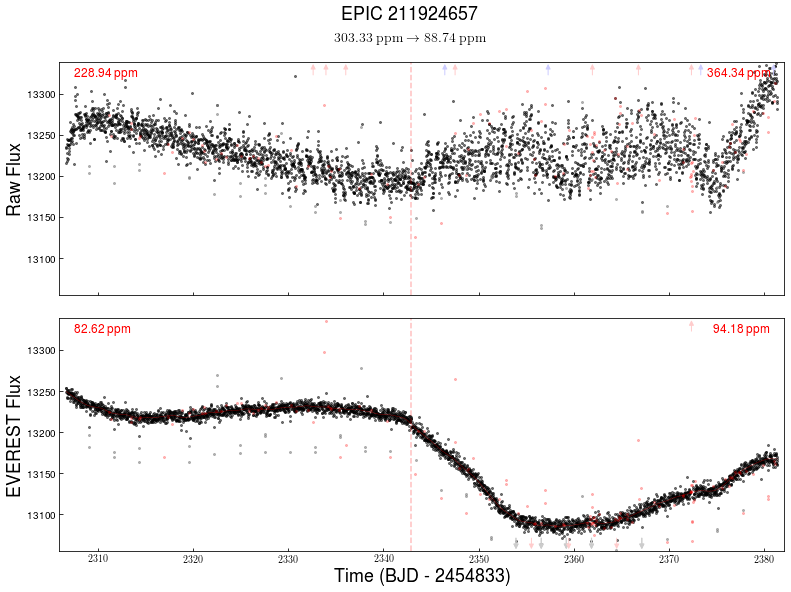

In [3]:
star1.plot()

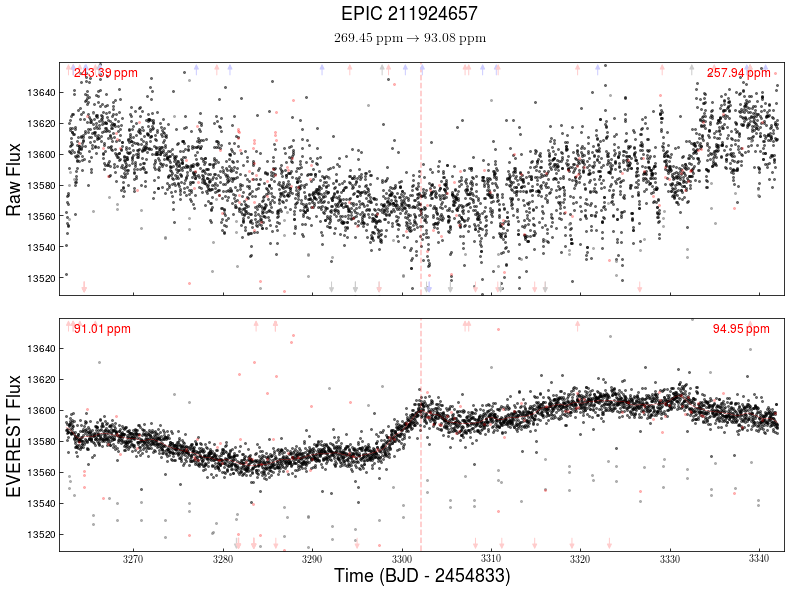

In [4]:
star2.plot()

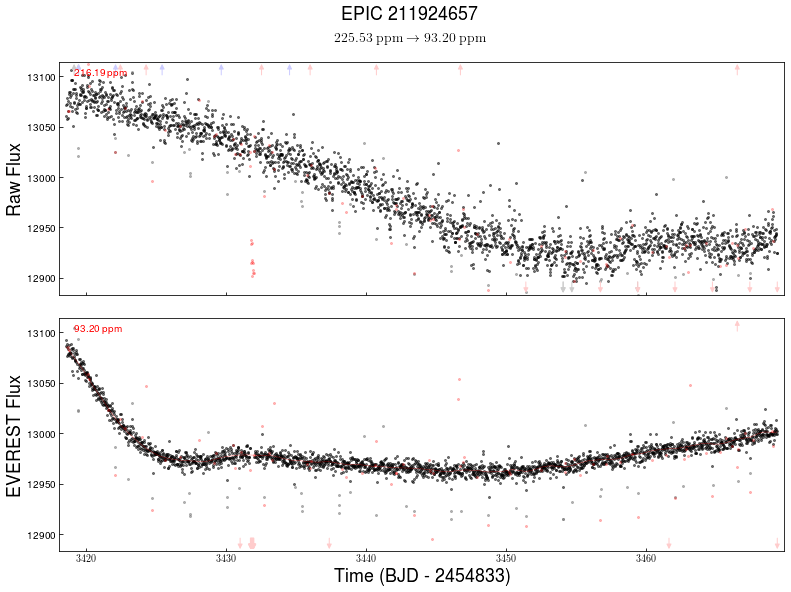

In [5]:
star3.plot()

In [6]:
tpf = lk.search_targetpixelfile('EPIC'+str(EPIC)).download()

Started querying MAST for observations within 0.0001 arcsec of objectname='EPIC211924657'.
MAST found 5 observations. Now querying MAST for the corresponding data products.
MAST found 3 matching data products.
/Users/daniella/opt/anaconda3/lib/python3.7/site-packages/lightkurve/search.py:233: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning)
Started downloading http://archive.stsci.edu/missions/k2/lightcurves/c5/211900000/24000/ktwo211924657-c05_llc.fits.
Finished downloading.
Opening /Users/daniella/.lightkurve-cache/mastDownload/K2/ktwo211924657-c05_lc/ktwo211924657-c05_lpd-targ.fits.gz.
Detected filetype: 'KeplerTargetPixelFile'.
6% (217/3663) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


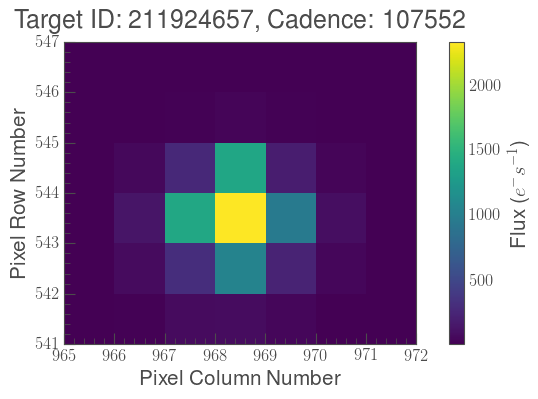

In [7]:
tpf.plot()

In [8]:
rawlc = tpf.to_lightcurve()

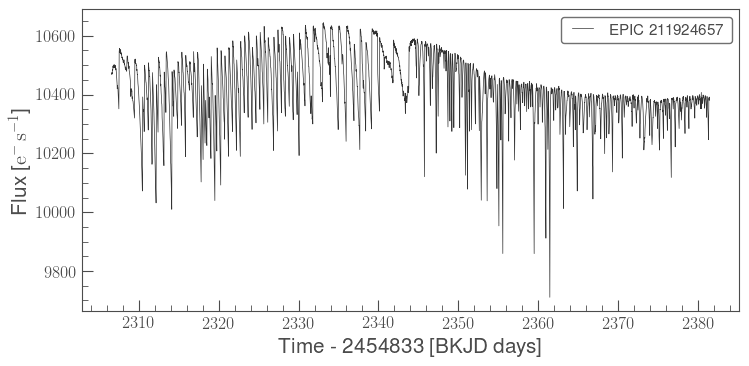

In [9]:
rawlc.plot()

### Apply filter

In [10]:
#fits_file1 = get_pkg_data_filename(star1.fitsfile) 

#fits.setval(fits_file, 'TTYPE2', value='SAP_FLUX', ext=1) 

In [11]:
#pyke.kepfilter(star.fitsfile,                                          #filters the fits file and saves it as EverestFits-KepFiltered.fits
#               passband='high',
#               outfile="EverestFits-KepFiltered.fits",
#               overwrite=True,
#               datacol='SAP_FLUX',
#               function='boxcar',
#               logfile='kepfilter.log')

In [12]:
#ts_original = TimeSeries.read(star.fitsfile,format='kepler.fits') 
#ts = TimeSeries.read('EverestFits-KepFiltered.fits',format='kepler.fits') 

In [13]:
#plt.plot(ts_original['time'].jd, ts_original['sap_flux'])

In [14]:
#plt.plot(ts['time'].jd, ts['sap_flux'])

### Alternative: flatten lightcurve

In [10]:
lc1 = lk.LightCurve(time=star1.time, flux=star1.flux)
lc2 = lk.LightCurve(time=star2.time, flux=star2.flux)
lc3 = lk.LightCurve(time=star3.time, flux=star3.flux)

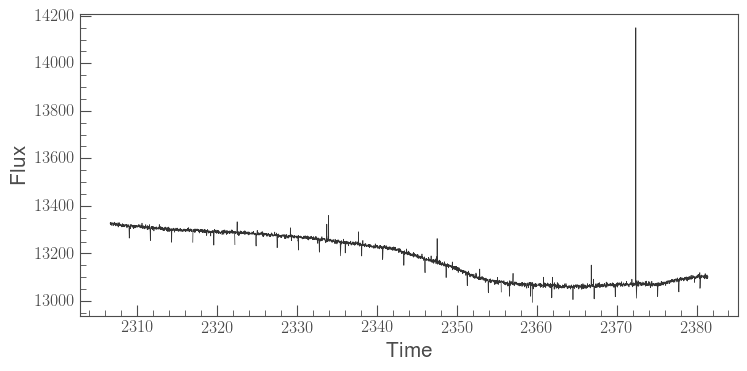

In [11]:
lc1.plot()

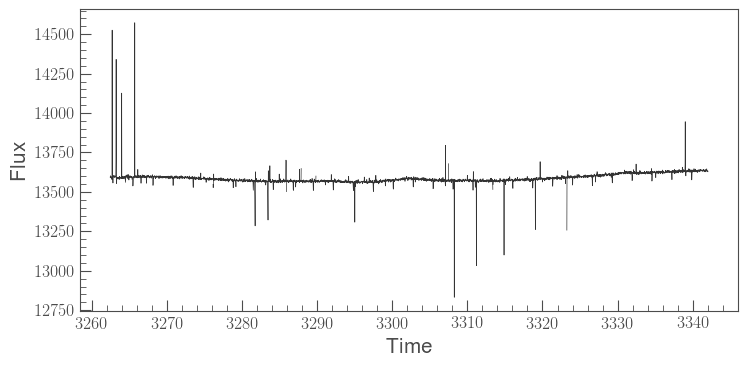

In [12]:
lc2.plot()

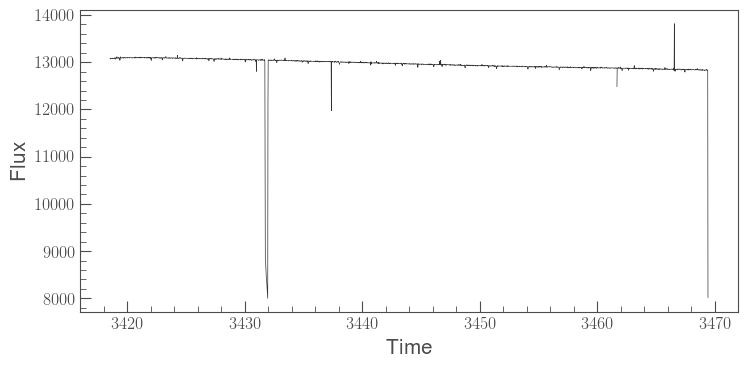

In [13]:
lc3.plot()

In [14]:
flat1, trend1 = lc1.flatten(return_trend=True)
flat1 = flat1.remove_outliers()
flat2, trend2 = lc2.flatten(return_trend=True)
flat2 = flat2.remove_outliers()
flat3, trend3 = lc3.flatten(return_trend=True)
flat3 = flat3.remove_outliers()

(<matplotlib.axes._subplots.AxesSubplot at 0x1c302b4710>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c3048ce90>)

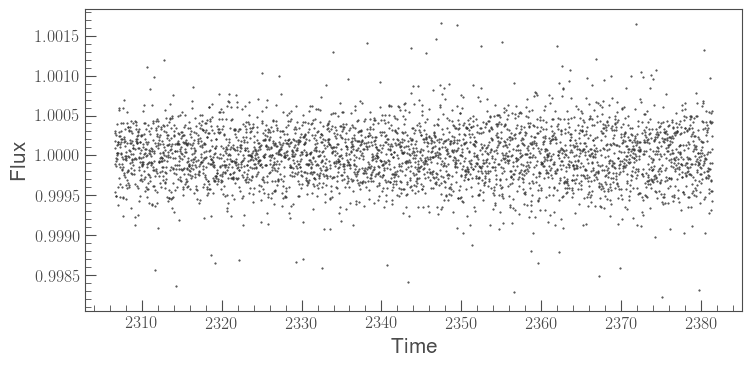

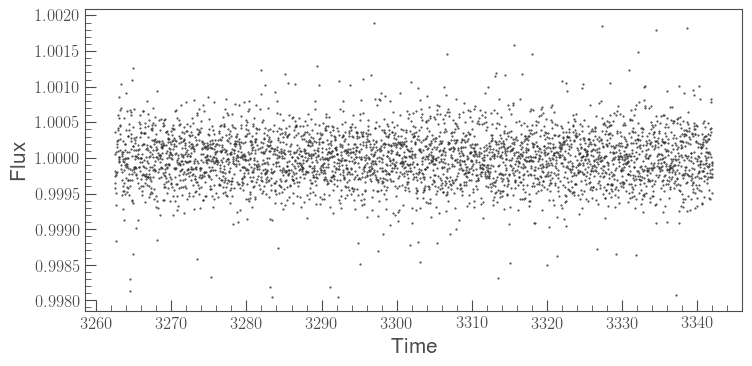

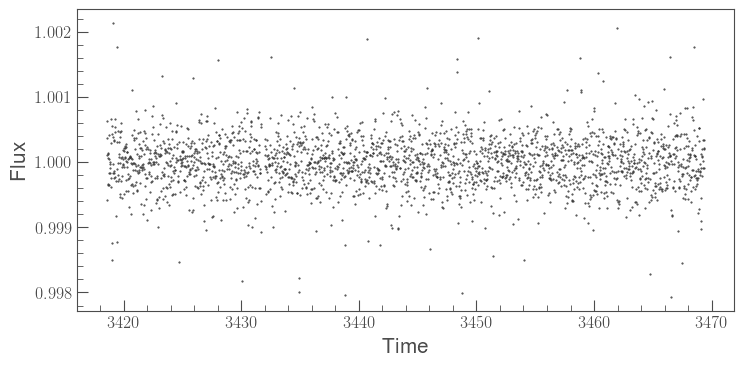

In [15]:
flat1.plot(marker='.',linestyle='None'), flat2.plot(marker='.',linestyle='None'), flat3.plot(marker='.',linestyle='None')

(<matplotlib.axes._subplots.AxesSubplot at 0x1c1c9969d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c1cb1a8d0>)

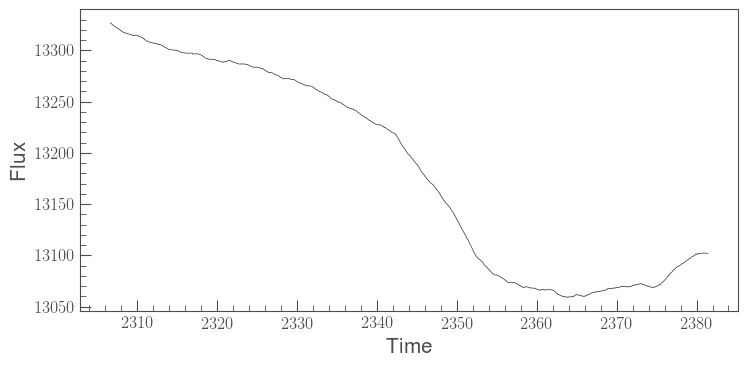

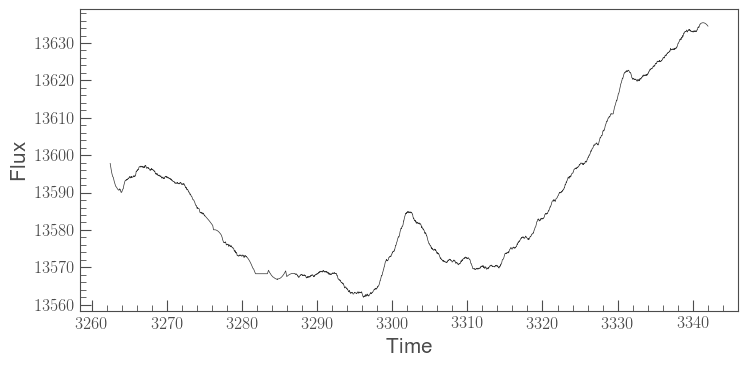

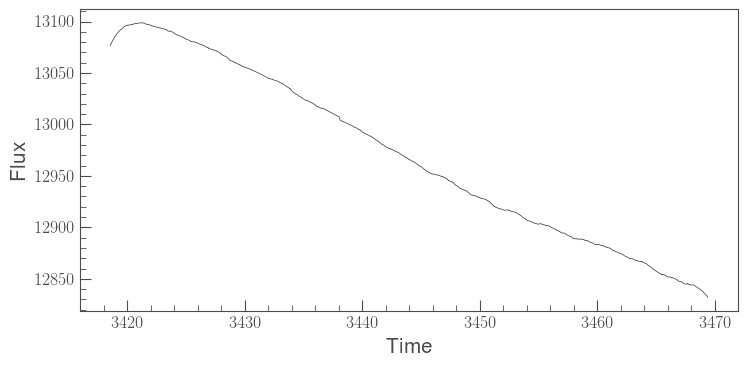

In [16]:
trend1.plot(), trend2.plot(), trend3.plot()

### Get periods

First try with original (raw) light curve

In [22]:
#model = BoxLeastSquares(ts_original.time.jd, ts_original['sap_flux'], dy=0.01)
#periods = np.linspace(2, 50, 100000)
#periodogram = model.power(periods, 0.16)
#best_fit_period = periodogram.period[np.argmax(periodogram.power)]
#transit_time = periodogram.transit_time[np.argmax(periodogram.power)]

In [23]:
#periodogram

This is because original light curve has lots of NaNs

Next: PyKE-filtered lightcurve

In [24]:
#model = BoxLeastSquares(ts.time.jd, ts['sap_flux'], dy=0.01)
#periods = np.linspace(2, 60, 100000)
#periodogram = model.power(periods, 0.16)
#best_fit_period = periodogram.period[np.argmax(periodogram.power)]
#transit_time = periodogram.transit_time[np.argmax(periodogram.power)]

In [25]:
#plt.plot(periodogram['period'], periodogram['power'])

PyKE automatically filters out all NaNs, so it returns real periods 

In [26]:
#best_fit_period, transit_time

Next: Flat light curve with lk.flatten

In [17]:
model1 = BoxLeastSquares(flat1.time, flat1.flux, dy=0.01)
periods1 = np.arange(1, 3, 0.001)
periodogram1 = model1.power(periods1, 0.16)
best_fit_period1 = periodogram1.period[np.argmax(periodogram1.power)]
transit_time1 = periodogram1.transit_time[np.argmax(periodogram1.power)]

In [18]:
model2 = BoxLeastSquares(flat2.time, flat2.flux, dy=0.01)
periods2 = np.arange(1, 3, 0.001)
periodogram2 = model2.power(periods2, 0.16)
best_fit_period2 = periodogram2.period[np.argmax(periodogram2.power)]
transit_time2 = periodogram2.transit_time[np.argmax(periodogram2.power)]

In [19]:
model3 = BoxLeastSquares(flat3.time, flat3.flux, dy=0.01)
periods3 = np.arange(1, 3, 0.001)
periodogram3 = model3.power(periods3, 0.16)
best_fit_period3 = periodogram3.period[np.argmax(periodogram3.power)]
transit_time3 = periodogram3.transit_time[np.argmax(periodogram3.power)]

**The periods we pick to explore BLS matter a lot!!** 

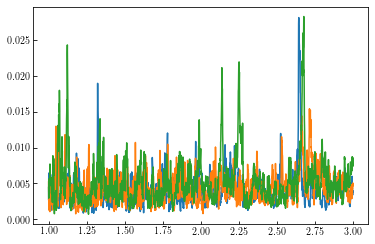

In [20]:
plt.plot(periodogram1['period'], periodogram1['power'])
plt.plot(periodogram2['period'], periodogram2['power'])
plt.plot(periodogram3['period'], periodogram3['power'])

In [21]:
best_fit_period1, best_fit_period2, best_fit_period3 

(2.642999999999819, 2.7129999999998113, 2.6759999999998154)

In [22]:
transit_time1, transit_time2, transit_time3

(2309.0267322105965, 3264.4678187289683, 3419.3302759106377)

### different periodogram

(<matplotlib.axes._subplots.AxesSubplot at 0x1c30e29ed0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c30e65c50>)

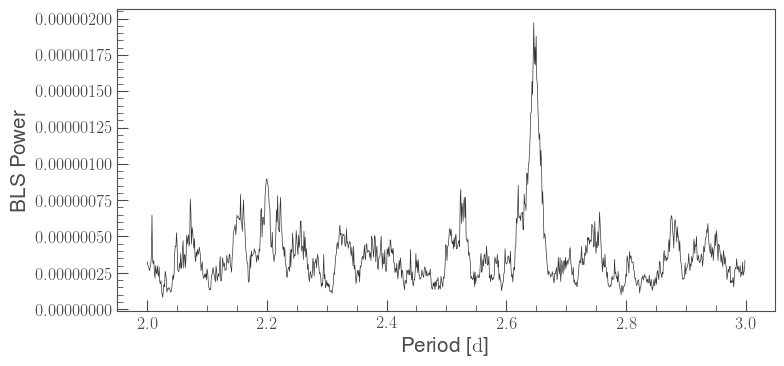

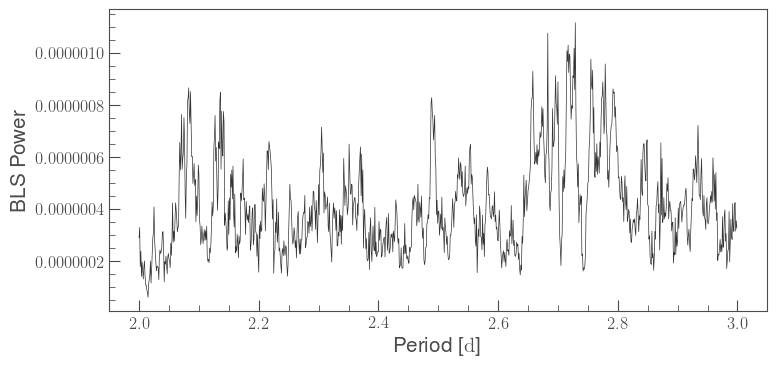

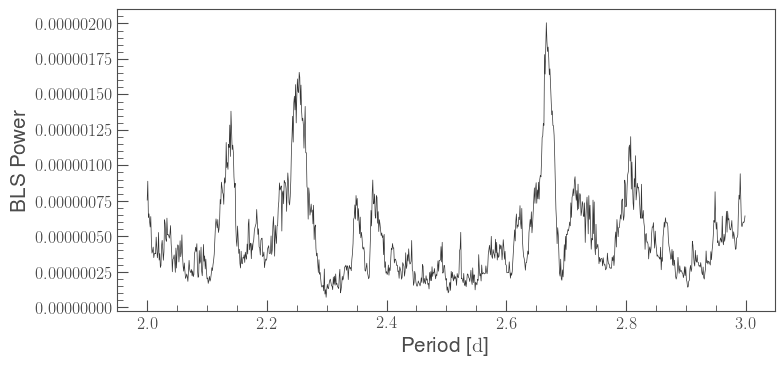

In [23]:
periodogram1 = flat1.to_periodogram(method="bls", period=np.arange(2, 3, 0.001))
periodogram2 = flat2.to_periodogram(method="bls", period=np.arange(2, 3, 0.001))
periodogram3 = flat3.to_periodogram(method="bls", period=np.arange(2, 3, 0.001))
periodogram1.plot(), periodogram2.plot(), periodogram3.plot(), 

In [24]:
periodogram1.period_at_max_power.value, \
periodogram2.period_at_max_power.value, \
periodogram3.period_at_max_power.value, 

(2.645999999999929, 2.7289999999999197, 2.6669999999999265)

In [25]:
periodogram1.transit_time_at_max_power, \
periodogram2.transit_time_at_max_power, \
periodogram3.transit_time_at_max_power, 

(2308.9107322105965, 3264.3678187289684, 3419.4212759106376)

In [26]:
best_fit_period = periodogram1.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 2.646 d


# winner winner chicken dinner!!!

### combine light curves

In [38]:
comblc = flat1.append(flat2).append(flat3)

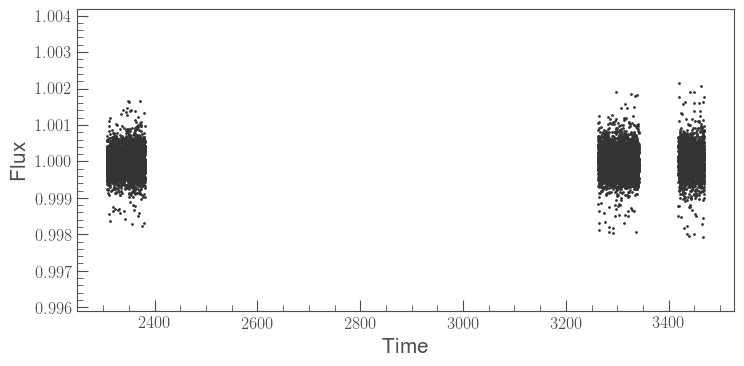

In [39]:
comblc.scatter()

In [40]:
flatlc = comblc.normalize().flatten()

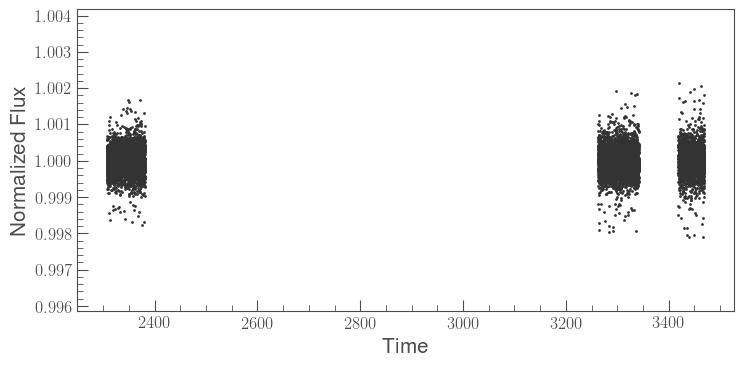

In [41]:
flatlc.scatter()

In [49]:
periodogram = flatlc.to_periodogram(method="bls", period=np.arange(2, 3, 0.001))

In [57]:
periodogram.depth_at_max_power, periodogram.duration_at_max_power, periodogram.frequency_at_max_power, periodogram.period_at_max_power, periodogram.transit_time_at_max_power

(6.182042709803313e-05,
 <Quantity 0.25 d>,
 <Quantity 0.44345898 1 / d>,
 <Quantity 2.255 d>,
 2307.5857322105962)

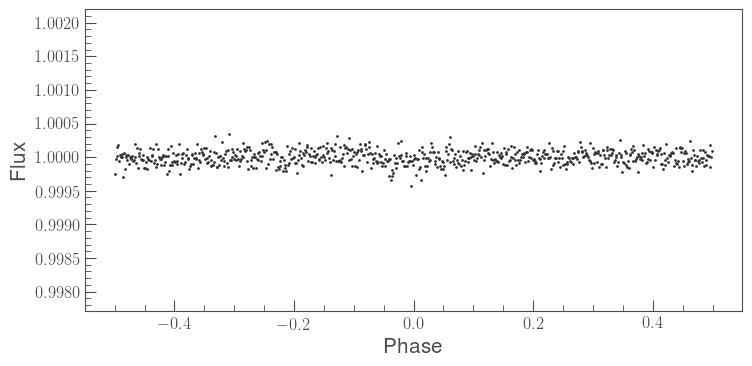

In [58]:
flatlc.fold(period=periodogram.period_at_max_power, t0=periodogram.transit_time_at_max_power).bin().scatter()

In [37]:
time = np.concatenate([flat1.time,flat2.time,flat3.time])
flux = np.concatenate([flat1.flux,flat2.flux,flat3.flux])
fluxerr = np.concatenate([flat1.flux_err,flat2.flux_err,flat3.flux_err])
time13 = np.concatenate([flat1.time,flat3.time])
flux13 = np.concatenate([flat1.flux,flat3.flux])
fluxerr13 = np.concatenate([flat1.flux_err,flat3.flux_err])

In [38]:
flat1.time, flat2.time, flat3.time

(array([2306.61073221, 2306.63116442, 2306.65159643, ..., 2381.39098371,
        2381.4114157 , 2381.43184759]),
 array([3262.46781873, 3262.48825411, 3262.50868959, ..., 3341.98210111,
        3342.00253597, 3342.02297074]),
 array([3418.54627591, 3418.56670825, 3418.5871404 , ..., 3469.33980379,
        3469.36023533, 3469.38066706]))

In [39]:
comblc = lk.LightCurve(time, flux, fluxerr).remove_outliers()
comblc13 = lk.LightCurve(time13, flux13, fluxerr13).remove_outliers()

### Fold light curve

In [40]:
folded1 = flat1.fold(period = best_fit_period1, t0 = transit_time1).remove_outliers()
folded2 = flat2.fold(period = best_fit_period2, t0 = transit_time2).remove_outliers()
folded3 = flat3.fold(period = best_fit_period3, t0 = transit_time3).remove_outliers()

(<matplotlib.axes._subplots.AxesSubplot at 0x1c36289610>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c37219e50>)

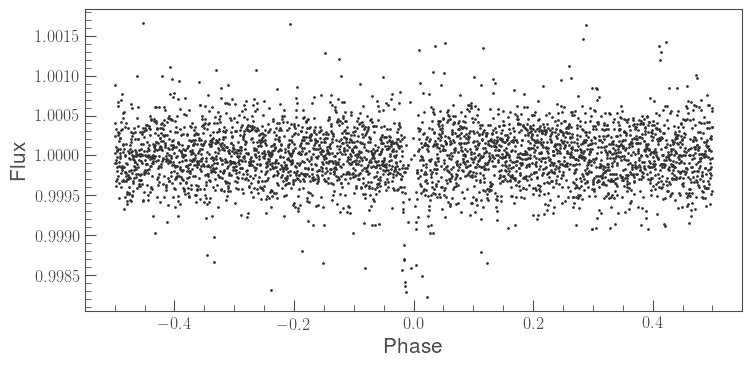

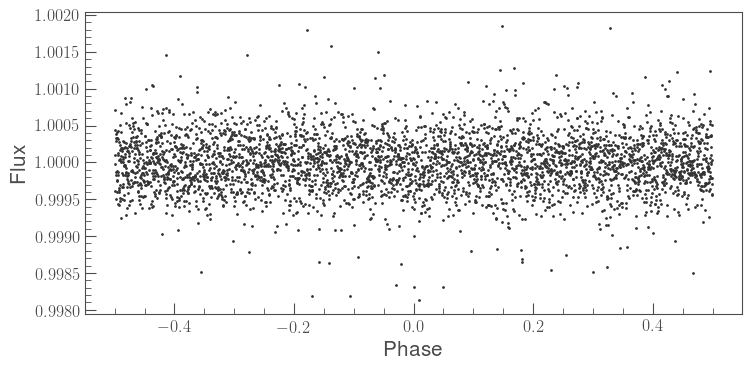

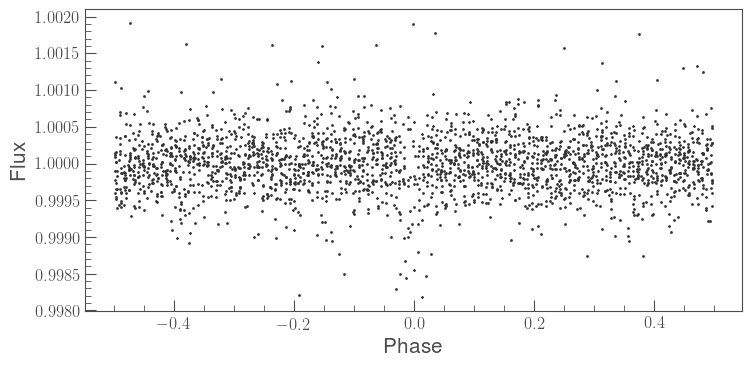

In [41]:
folded1.plot(marker='o',linestyle='None'), folded2.plot(marker='o',linestyle='None'), folded3.plot(marker='o',linestyle='None'), 

In [42]:
#folded_lc = flat.fold(period = best_fit_period, t0 = periodogram.transit_time_at_max_power)
folded_lc = comblc.fold(period = best_fit_period1, t0 = transit_time1).remove_outliers()
folded_lc13 = comblc13.fold(period = best_fit_period1, t0 = transit_time1).remove_outliers()

(<matplotlib.axes._subplots.AxesSubplot at 0x1c37513650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c377805d0>)

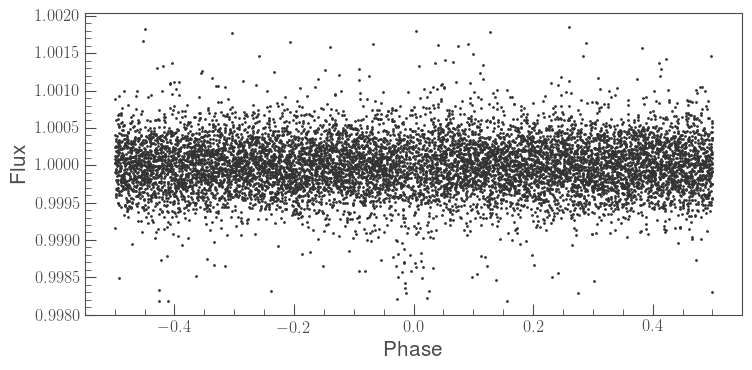

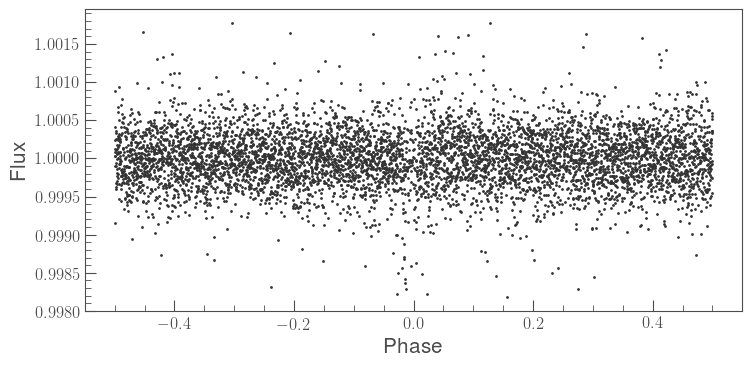

In [43]:
folded_lc.plot(marker='o',linestyle='None'), folded_lc13.plot(marker='o',linestyle='None'), 

In [44]:
folded_lc.time.shape

(9618,)

In [45]:
binned_lc = folded_lc13.bin(bins=1200, method='mean')

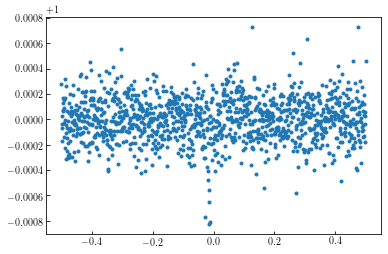

In [46]:
plt.plot(binned_lc.phase, binned_lc.flux, marker='.', linestyle='None')

### Transit fitting

In [47]:
lc = LightCurve(folded_lc13.time, folded_lc13.flux, folded_lc13.flux_err, name='Data')
lc.plot()

In [48]:
np.isnan(binned_lc.flux).sum(), np.isnan(binned_lc.time).sum()

(0, 0)

In [102]:
# Create a PolynomialModel instance with coeffs [c0, c1]. Also give it a name and format for fun.
lin_model = PolynomialModel(c1=0.00001, c0=1, name='linear', fmt='g--')

# Plot it
lin_model.plot(folded_lc.time,draw=True)

# Set the initial parameters
params = Parameters()<br>
params.rp = 0.22, 'free', 0.0, 0.4<br>
params.per = 40.721490, 'fixed'<br>
params.t0 = 0.48, 'free', 0, 1<br>
params.inc = 89.7, 'free', 80., 90.<br>
params.a = 18.2, 'free', 15., 20.<br>
params.ecc = 0., 'fixed'<br>
params.w = 90., 'fixed'<br>
params.limb_dark = '4-parameter', 'independent'<br>
params.transittype = 'primary', 'independent'<br>
params.u1 = 0.1, 'free', 0., 1.<br>
params.u2 = 0.1, 'free', 0., 1.<br>
params.u3 = 0.1, 'free', 0., 1.<br>
params.u4 = 0.1, 'free', 0., 1.

In [103]:
# Set the intial parameters
params = Parameters()
params.rp = 0.0577, 'free', 0.0, 0.2
params.per = periodogram1.period_at_max_power.value, 'fixed'
params.t0 = 0, 'fixed'
params.inc = 89.7, 'free', 80., 90.
params.a = 15.5, 'fixed', 10, 20.
params.ecc = 0., 'fixed'
params.w = 90., 'fixed'
params.limb_dark = '4-parameter', 'independent'
params.transittype = 'primary', 'independent'
params.u1 = 0.1, 'free', 0., 1.
params.u2 = 0.1, 'free', 0., 1.
params.u3 = 0.1, 'free', 0., 1.
params.u4 = 0.1, 'free', 0., 1.

In [104]:
# Make the transit model
t_model = TransitModel(parameters=params, name='transit', fmt='r--')

In [105]:
# Plot it
t_model.plot(folded_lc.time, draw=True)

In [56]:
# Make a new model by multiplying some model components (which don't necessarily overlap)
comp_model = t_model*lin_model
comp_model.name = 'composite'

# Plot it
comp_model.plot(folded_lc.time, draw=True)

In [114]:
lc.time.shape, lc.flux.shape, t_model.flux, t_model.time.shape

((1000,), (1000,), None, (9618,))

In [58]:
# Create a new model instance from the best fit parameters
lc.fit(t_model, fitter='lmfit', method='powell')

ValueError: operands could not be broadcast together with shapes (9618,) (5910,) 

In [490]:
# Plot it
lc.plot()

### Test

In [59]:
from exoctk.lightcurve_fitting.simulations import simulate_lightcurve
time, flux, flux_unc, sim_params = simulate_lightcurve('WASP-19b')

In [60]:
sim_params

{'canonical_name': 'WASP-19 b',
 'exoplanetID': 5170,
 'catalog_name': 'nexsci',
 'planet_name': 'WASP-19 b',
 'disposition': 'confirmed planet',
 'modified_date': '2020-05-07 15:33:36.043000',
 'star_name': 'WASP-19',
 'component': 'b',
 'Rs': 1.0,
 'Rs_unit': 'R_sun',
 'Rs_upper': 0.02,
 'Rs_lower': 0.02,
 'Rs_ref': 'Wong et al. 2016',
 'Rs_url': 'https://ui.adsabs.harvard.edu/abs/2016ApJ...823..122W/abstract',
 'Ms': 0.9,
 'Ms_unit': 'M_sun',
 'Ms_upper': 0.04,
 'Ms_lower': 0.04,
 'Ms_ref': 'Wong et al. 2016',
 'Ms_url': 'https://ui.adsabs.harvard.edu/abs/2016ApJ...823..122W/abstract',
 'Fe/H': 0.15,
 'Fe/H_upper': 0.07,
 'Fe/H_lower': 0.07,
 'Fe/H_ref': 'Wong et al. 2016',
 'Fe/H_url': 'https://ui.adsabs.harvard.edu/abs/2016ApJ...823..122W/abstract',
 'stellar_gravity': 4.45,
 'stellar_gravity_upper': 0.05,
 'stellar_gravity_lower': 0.05,
 'stellar_gravity_ref': 'Wong et al. 2016',
 'stellar_gravity_url': 'https://ui.adsabs.harvard.edu/abs/2016ApJ...823..122W/abstract',
 'Teff': 55

In [68]:
lc = LightCurve(time, flux[0], flux_unc[0])
lc.plot()

In [69]:
# Create a PolynomialModel instance with coeffs [c0, c1]. Also give it a name and format for fun.
lin_model = PolynomialModel(c1=0.00001, c0=1, name='linear', fmt='g--')

# Plot it
lin_model.plot(folded_lc.time,draw=True)

In [98]:
# Set the intial parameters
params = Parameters()
params.rp = 1.395, 'free', 0.1, 0.3
params.per = 0.78884, 'fixed'
params.t0 = 0, 'free', 55708., 55709.
params.inc = 79.4, 'free', 80., 90.
params.a = 0.01616, 'free', 1., 5.
params.ecc = 0.0046, 'fixed'
params.w = 	3.0, 'fixed'
params.limb_dark = '4-parameter', 'independent'
params.transittype = 'primary', 'independent'
params.u1 = 0.1, 'free', 0., 1.
params.u2 = 0.1, 'free', 0., 1.
params.u3 = 0.1, 'free', 0., 1.
params.u4 = 0.1, 'free', 0., 1.

# Make the transit model
t_model = TransitModel(parameters=params, name='transit', fmt='r--')

# Plot it
t_model.plot(time, draw=True)

In [99]:
# Make the transit model
t_model = TransitModel(parameters=params, name='transit', fmt='r--')

In [100]:
# Plot it
t_model.plot(folded_lc.time, draw=True)

In [101]:
# Create a new model instance from the best fit parameters
lc.fit(t_model, fitter='lmfit', method='powell')

ValueError: operands could not be broadcast together with shapes (9618,) (1000,) 